<a href="https://colab.research.google.com/github/Yashasvi-Shukl/Statistics/blob/main/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

><font color='blue'>A survey shows that the average black friday sales of male is much higher(500$) when compared to that of female. A company which is planning for it's black friday sales want to know if this is true and hence wanted to take data from samples of different sizes such as 100,500,1000 from the population and note their black friday spending details.The company wants to know if there is really any difference in spending or it is just by chance(with significance leve 15%). Can you help the company come to a conclusion on this with the help of data provided about different samples?</font> 

<ol>
    <li> <b>Stating Null Hypothesis and Alternate Hypothesis</b>
        <ul>
            <li><font color='brown'> Null Hypothesis $H_0$</font>:The average spending of male and female is same i.e, $\mu_m= \mu_f$ </li>
            <li><font color='brown'> Alternative Hypothesis $H_a$</font>: The average spending of male is greater than that of female, i.e, $\mu_m > \mu_f $ </li>
        </ul>
    </li>
    <br>
    <li> <b>Choosing significance level</b>
        <ul>
            <li>As it was not mentioned in the problem we are taking the standard significance level <font color='red'> $\alpha=0.15 $</font></li>
        </ul>
    </li>
    <br>
    <li> <b>Setting up Test Statistic</b>
        <ul>
           <li><font color='brown'>How do we decide whether or not to reject the null hypothesis H0 ?</font>
               <br>a. we start by determining a test statistic with our sample data</li>
           <li><font color='brown'>What is test statistic?</font>
               <br>a. It is the evidence that we look for, to prove our null hypothesis
               <br>b. The most natural choice for a test statistic of the difference in population mean is the difference in sample mean $ \mu_m-\mu_f $.
        </ul>
    </li>
    
</ol>

 
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import random
from prettytable import PrettyTable

In [2]:
!wget https://raw.githubusercontent.com/mathubhalan/Black-Friday-Sales/master/Data/BlackFriday.csv

--2021-05-14 05:51:05--  https://raw.githubusercontent.com/mathubhalan/Black-Friday-Sales/master/Data/BlackFriday.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24418530 (23M) [text/plain]
Saving to: ‘BlackFriday.csv’

BlackFriday.csv     100%[===================>]  23.29M  52.0MB/s    in 0.4s    

2021-05-14 05:51:06 (52.0 MB/s) - ‘BlackFriday.csv’ saved [24418530/24418530]



In [3]:
df = pd.read_csv("BlackFriday.csv")
data_male = df[df["Gender"] == "M"]["Purchase"].values
data_female = df[df['Gender'] == 'F']['Purchase'].values

In [4]:
def cdf_plot(sample_diff, i, clr, threshold, sample_size):
  sn.kdeplot(sample_diff,cumulative=True, ax=axs[i])
  axs[i].axvline(threshold, linestyle = '--', color = clr, label = 'Threshold '+str(threshold))
  axs[i].set_title("CDF of differences for " + str(sample_size) +" samples")
  axs[i].legend()

In [5]:
def Mean_difference(data_male, data_female):
  difference = np.round(np.array(data_male).mean() - np.array(data_female).mean(), 3)
  return difference

In [6]:
def Calculate_PValue(data_male, data_female, diff_mean, alpha):

  # Merging both male and female data to create a pool
  total_sample = np.append(data_female,data_male)
  # Create list to store the average values of both the samples and the difference of them
  diff = []
  # Sampling the data for 1000 times
  for i in range(0,1000):
    #Picking 100 random numbers 
    sample = np.array(random.sample(list(total_sample), 100))
    #First 50 random numbers are taken as set 1
    set1 = sample[:50].mean()
    #Next 50 random numbers are taken as set 2
    set2 = sample[50:].mean()
    #Taking the differnce between the two sets
    diff.append(set1 - set2)
    
  #Step3- Sorting the values and counting the number of values greater than the threshold
  diff.sort()

  count = sum(((i > diff_mean) and (i>0)) for i in diff)
  pValue = count/len(diff)
  print("Percentage of values greater than the difference",diff_mean," =",pValue*100,"%")
  print("The pValue = ",pValue, "and the significance P(Reject H0 when H0 is true)=",alpha)

  if pValue>alpha:
    print("We fail to reject the null hypothesis")
  else:
    print("We can reject the null hypothesis")

  return diff


100
100
Percentage of values greater than the difference 264.17  = 40.1 %
The pValue =  0.401 and the significance P(Reject H0 when H0 is true)= 0.15
We fail to reject the null hypothesis
500
500
Percentage of values greater than the difference 953.574  = 17.4 %
The pValue =  0.174 and the significance P(Reject H0 when H0 is true)= 0.15
We fail to reject the null hypothesis
1000
1000
Percentage of values greater than the difference 733.514  = 23.799999999999997 %
The pValue =  0.238 and the significance P(Reject H0 when H0 is true)= 0.15
We fail to reject the null hypothesis


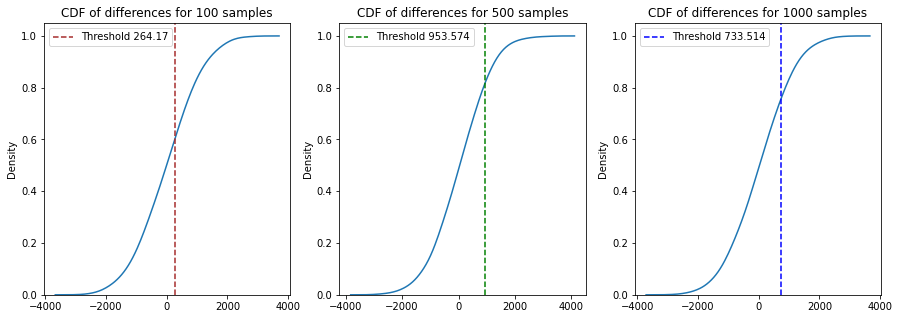

In [15]:
sample_sizes = [100, 500, 1000]
alpha = 0.15
clrs = ['brown', 'g', 'blue']
fig, axs = plt.subplots(1, 3,figsize=(15, 5))

for i,j in enumerate(sample_sizes):

  female_sample = random.sample(list(data_female), j)
  male_sample = random.sample(list(data_male), j)
  print(len(female_sample))
  print(len(male_sample))

  #Step 1- Combine both samples of size 50 each to a large sample of size 100 to simulate null hypothesis
  mean_diff = Mean_difference(male_sample, female_sample)
  sample_diff = Calculate_PValue(male_sample, female_sample, mean_diff, alpha) 

  cdf_plot(sample_diff, i, clrs[i], mean_diff, j)

> <h4> <font size=4 color='#339933'> A company wants know if black friday spendings of males follow a normal distribution.A sample of 30 males were asked about thier spendings and their answers were recorded. Determine if this sample comes from normal distribution with 5% signinifance level.  </font> </h4>

__<font  color='#7300e6'>Q:Given two samples, how can we find whether they are follow same distribution or not? </font>__

<font color='#339933'>
    Ans: <font color='red'>Q-Q Plot </font>can be used for graphically visualize how two distributions are ,but Q-Q plot cannot quantify how much different one distribution is to another. Therefore we cannot perform Hypothesis testing using Q-Q plot.

</font>

__<font color='#7300e6'>Q:Then how to measure the Similarity ?</font>__


KS Test can be performed for two types of problems.
1. There's the <b>one sample Kolmogorov-Smirnov test</b> for testing if a variable follows a given distribution in a population. This “given distribution” is usually -not always- the normal distribution, hence “Kolmogorov-Smirnov normality test”. 
2. There's also the <b>independent samples Kolmogorov-Smirnov test</b> for testing if a variable has identical distributions in 2 populations.

1. State the Null hypothesis that both the random variables come from same distribution
2. State the  Alternative hypothesis that both the random variables do not come from same distribution
3. Setup a confidence interval value
4. Calculate the D value using following formula $D_n,_m=Maximum|F_n(X)−F_m(X)|$
5. The null hypothesis is rejected at level $\alpha $ if $$D_{n,m} > c(\alpha) \sqrt(\frac{n+m}{nm})$$ where $c(\alpha)=\sqrt(-\frac{1}{2}log_e\frac{alpha}{2})$ <br> $n$,$m$ =number of points in samples.


  <h4><font color='blue'> Step 1:</font> <b>Stating Null Hypothesis and Alternate Hypothesis</b></h4>
         

<font color='brown'> Null Hypothesis $H_0$</font>:The black friday spendings of males follow a normal distribution.<br>
<font color='brown'> Alternative Hypothesis $H_a$</font>: The black friday spendings of males do not follow a normal distribution.

In [8]:
# Taking one sample of size 500 from unknown disb
samples = np.array(random.sample(range(0, data_male.shape[0]), 30))
samples = (samples-samples.mean())/samples.std() #normalizing the sample

# Taking a sample of size 1000 from known disb
norm_samples=np.random.normal(loc=0.0, scale=1.0, size=30)
# norm_samples=(normal-normal.mean())/normal.std()

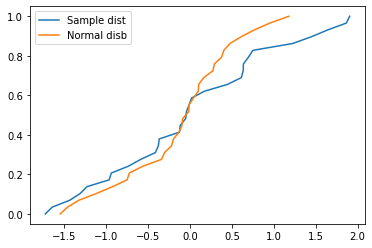

In [9]:
sorted_data = np.sort(samples)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)

norm_sorted_data = np.sort(norm_samples)
norm_yvals=np.arange(len(norm_sorted_data))/float(len(norm_sorted_data)-1)

plt.plot(sorted_data,yvals,label='Sample dist')
plt.plot(norm_sorted_data,norm_yvals,label='Normal disb') 

plt.legend()
plt.show()

<font color='blue'> Step 2:</font> <b>Choosing significance level</b>

 Note that the significance level is  mentioned in the problem.<font color='red'> $$\alpha=0.05 $$</font>

<font color='blue'> Step 3:</font> <b>Calculating the test statistic</b>

<ul>
    <li>Here the test statistic we are dealing with is $D_N,_M$</li>
    <li> $D_N,_M$ is maximum distance between CDF of two distributions 
</ul>

In [10]:
#https://github.com/scipy/scipy/blob/v0.14.0/scipy/stats/stats.py#L3809
#sorting the data
data1 = np.sort(samples)
data2 = np.sort(norm_samples)
#storing the length of data
n1 = data1.shape[0]
n2 = data2.shape[0]
data_all = np.concatenate([data1, data2])
#calculating cdf
cdf1 = np.searchsorted(data1, data_all, side='right') / n1
cdf2 = np.searchsorted(data2, data_all, side='right') / n2
# d=max(abs(cdf1-cdf2))
d = np.max(np.absolute(cdf1 - cdf2))

In [11]:
print('The test statictic d=',d)

The test statictic d= 0.2333333333333334


<h4> Calculating test statistic using scipy.stats api </h4>

In [12]:
from scipy.stats import ks_2samp
d,p=ks_2samp(norm_samples,samples)

In [13]:
print('The D value when calculated using scipy.stats api is',d ,'which is exactly equal to value we got')

The D value when calculated using scipy.stats api is 0.23333333333333334 which is exactly equal to value we got


In [14]:
print('Corresponding P value for the D is ',p)

Corresponding P value for the D is  0.39294501397971776


<font color='blue'> Step 4:</font> <b>Comparing P value with Significance level</b>

<font> We can clearly observe that P value <font color='red'>0.393 > 0.05</font> and hence we <b>fail to reject the null </b> hypothesis $H_0$ that both the first sample come from normal distribution </font>